In [1]:
# Load some relevant modules for this exercise
import postgkyl as pg
import matplotlib.pyplot as plt
import os
import numpy as np


In [2]:
# Select which output step to load
step = 1

# Load electron distribution function data from a Gkeyll output file
# This file was generated using a serendipity basis with poly_order = 2
elc = pg.data.GData(f'/dartfs-hpc/rc/home/7/f007gj7/data/TWO_GK/rt_vlasov_twostream_p2-elc_{step}.gkyl')

# Set up modal-to-nodal interpolation of the distribution function
# Arguments:
#   - elc:        input Gkeyll data object
#   - 2:          polynomial order used in the simulation (poly_order)
#   - 'ms':       modal serendipity basis
elc_Interp = pg.data.GInterpModal(elc, 2, 'ms')

# Interpolate the modal data onto a uniform nodal grid
# interpGrid_elc contains the phase-space grid coordinates
# f_elc contains the interpolated distribution function values
interpGrid_elc, f_elc = elc_Interp.interpolate()
f_elc = f_elc[:, :, 0]

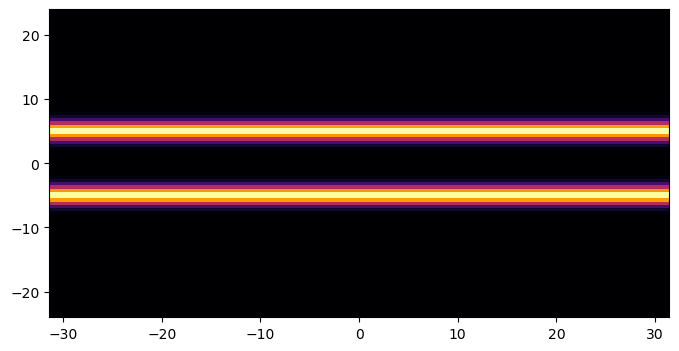

In [3]:
fig = plt.figure(figsize=(8, 4), dpi=100, facecolor='white')
ax = plt.subplot(111)

ax.imshow(f_elc.T, extent=(interpGrid_elc[0][0], interpGrid_elc[0][-1], interpGrid_elc[1][0], interpGrid_elc[1][-1]), origin='lower', cmap='inferno')
ax.set_aspect('auto')

In [4]:
# Load electric field data from the Gkeyll output file
# This file contains the DG representation of the electromagnetic field
e = pg.data.GData(
    f'/dartfs-hpc/rc/home/7/f007gj7/data/TWO_GK2/rt_vlasov_twostream_p2-field_{step}.gkyl'
)

# Set up the interpolator for the field data
# As above:
#   - poly_order = 2
#   - 'ms' indicates a serendipity basis
e_Interp = pg.data.GInterpModal(e, 2, 'ms')

# Interpolate only component 0 of the field (Ex in 1D)
# interpGrid contains the spatial grid
# exs contains the interpolated electric field values
interpGrid, exs = e_Interp.interpolate(0)

# Drop the extra dimension so exs is a 1D array over space
exs = exs[:, 0]

# Construct cell-centered spatial grid from cell edge coordinates
# interpGrid[0] contains the x-grid edges
ex_grid = (interpGrid[0][1:] + interpGrid[0][:-1]) / 2

# Compute the grid spacing dx (uniform grid assumed)
dx = np.diff(ex_grid)[0]